<a href="https://colab.research.google.com/github/wjsrlzhem/BBangBro_clone/blob/main/%ED%81%B4%EB%A1%9C%EB%B2%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
from glob import glob

THRESHOLD = 0.3

dir = '/content/drive/MyDrive/practice/클론코딩/빵형-네잎클로버/'

In [4]:
interpreter = tf.lite.Interpreter(model_path = dir + '4leaf_detector.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
from google.colab.patches import cv2_imshow

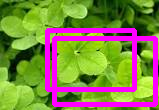

In [44]:
#img_list = glob( dir + 'detect4clover20200621/img/*.jpg')
#개인 사진
img_list = [dir + 'real2.jpg']
img_label = 0
for img_path in img_list:
  
  img = cv2.imread(img_path)
  h,w,_ = img.shape

  input_data = cv2.resize(img,(320,320))
  input_data = cv2.cvtColor(input_data,cv2.COLOR_BGR2RGB)
  input_data = np.expand_dims(input_data,axis=0)

  interpreter.set_tensor(input_details[0]['index'], input_data)
  interpreter.invoke()

  locations = interpreter.get_tensor(output_details[0]['index'])
  scores= interpreter.get_tensor(output_details[2]['index'])

  for location, score in zip(locations[0],scores[0]):
    if score < THRESHOLD:
      continue
    if location[0]>1. or location[1]>1. or location[2] >1. or location[3]>1.:
      continue

    y1,x1,y2,x2 = (location * [h,w,h,w]).astype(int)

    cv2.rectangle(img,pt1=(x1,y1),pt2 =(x2,y2), color = (255,0,255),thickness = 3)

  cv2_imshow(img)
  #cv2.imwrite(dir + 'result/%s.jpg' %img_label,img)
  #img_label +=1
  if cv2.waitKey(1) ==ord('q'):
    break